In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing

import os
from os import path

In [2]:
df_all = pd.DataFrame()
df_list = []

for folder in os.listdir():
    if not os.path.isdir(folder) or 'ipynb' in folder or folder == 'all_features':
        continue
    print(folder)
    df = pd.read_pickle(path.join(folder, 'regionprops_3d_extended.pkl'))
    df['condition'] = str(folder)
    df_list.append(df)

df_all = pd.concat(df_list)



JC_Plate3_high_3


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_low_3


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_control_1


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_high_1


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_low_2


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_high_2


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_low_1


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_control_3


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate3_control_2


/tmp/ipykernel_3475980/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


In [3]:
df_all.to_pickle('dataframe_labeled.pkl')

In [4]:
del df_all

In [5]:
df_all=pd.read_pickle('dataframe_labeled.pkl')

In [6]:
df_all.iloc[0].condition

'JC_Plate3_high_3'

In [7]:
df_all['condition'] = df_all['condition'].apply(lambda x: '_'.join(x.rsplit('_')[2:]))
df_all.iloc[0].condition

df = df_all

In [8]:
std_lower = np.std(df[df.area < np.percentile(df.area, 50)].area)
std_upper = np.std(df[df.area > np.percentile(df.area, 50)].area)

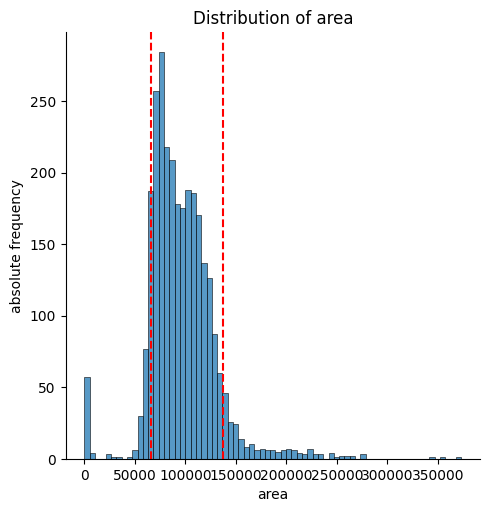

In [9]:
sns.displot(df.area)
plt.axvline(x=np.median(df.area) +  1.5*std_upper, color='r', linestyle='--')
plt.axvline(x=np.median(df.area) -  1.5*std_lower, color='r', linestyle='--')


plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')
plt.show()

In [10]:
df = df[(df.area >= (np.median(df.area) - 1.5 * std_lower)) & (df.area <= (np.median(df.area) +  1.5*std_upper))]

Text(5.069444444444445, 0.5, 'absolute frequency')

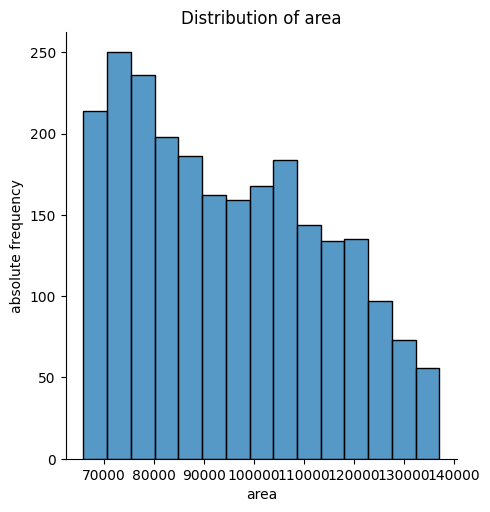

In [11]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


Text(5.069444444444445, 0.5, 'absolute frequency')

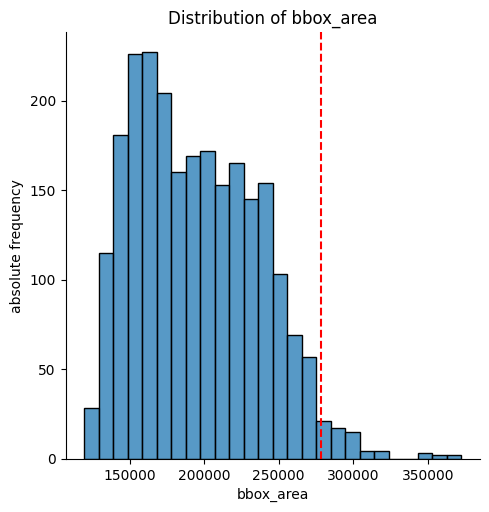

In [12]:
sns.displot(df.bbox_area)
plt.axvline(x=np.percentile(df.bbox_area, 97.5), color='r', linestyle='--')

plt.title('Distribution of bbox_area')
plt.xlabel('bbox_area')
plt.ylabel('absolute frequency')


In [13]:
df = df[df.bbox_area <= np.percentile(df.bbox_area, 97.5)]

Text(5.069444444444445, 0.5, 'absolute frequency')

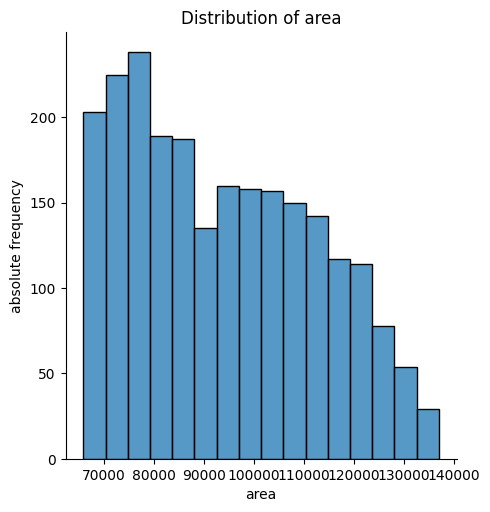

In [14]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


In [15]:
image_features = ['image', 'slice', 'intensity_image', 'convex_image']
df_images = df[image_features]
df = df.drop(columns=image_features)
df_images.to_pickle('dataframe_images.pkl')
df.to_pickle('dataframe_no_images.pkl')

In [16]:
del df_images
del df

In [17]:
df = pd.read_pickle('dataframe_no_images.pkl')
df = df.reset_index(drop=True)

In [18]:
columns = df.columns[0:-1]
df[columns] = df[columns].apply(pd.to_numeric, errors='ignore')

In [19]:
columns = df.columns[0:-1]
df[columns] = df[columns].applymap(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) > 0 else x)
#some entries are of dtype np.ndarray but only contain one value - extracting this value

In [20]:
cols = [col for col in df.columns if ('bbox' not in col and 'centroid' not in col and 'coords' not in col and 'label' not in col) or ('local' in col)]
df = df[cols]
#drop features with no biological relevance

In [21]:
df[df.isin([np.inf, -np.inf]).any(axis=1)]

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,condition
696,122794.0,101700.0,57.91274,-1,0.389118,1169.994223,2.094242,-17.177721,2.094242,556.562071,...,2756.320136,1.750559,2.683351,228.915641,18895.443595,1.406365,2.434857,0.200909,0.347837,control_1


In [22]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
df
#remove nuclei with inf values (only 1 so just remove)

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,condition
0,81122.0,71072.0,51.392527,1,0.454750,945.242647,-6.318170,32.063731,-6.318170,582.066514,...,616.623920,1.160458,0.110774,15.989394,143.452844,0.643472,0.242349,0.032174,0.012117,high_3
1,118771.0,110559.0,59.547723,1,0.548775,1318.934461,6.205151,2.465941,6.205151,741.014524,...,637.334552,1.170296,0.244418,3.000135,5.794670,0.642865,0.226616,0.013975,0.004926,high_3
2,114457.0,103402.0,58.234020,1,0.481172,1291.918662,2.825237,12.865795,2.825237,726.884744,...,368.640034,1.465861,0.378116,15.998742,136.072247,0.756459,0.481371,0.032890,0.020929,high_3
3,124913.0,108897.0,59.247828,1,0.486712,1531.567627,10.314480,-20.068957,10.314480,920.995781,...,522.436865,1.433697,0.756580,8.004748,72.674792,0.751746,0.526764,0.032685,0.022903,high_3
4,98341.0,85770.0,54.715738,1,0.460288,1289.193375,-4.849451,15.465537,-4.849451,597.487351,...,174.345961,1.260780,0.400247,6.670744,17.437804,0.812036,0.291775,0.025376,0.009118,high_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,75532.0,68048.0,50.653048,1,0.524333,1078.952610,-11.061315,-6.009168,-11.061315,559.958433,...,507.663580,1.339053,0.310450,7.442122,26.207933,0.744717,0.379178,0.031030,0.015799,control_2
2332,100964.0,92468.0,56.104489,1,0.510140,1216.128618,11.408687,-9.726331,11.408687,562.614941,...,377.753465,1.434440,0.216739,9.741966,60.798002,0.690969,0.259740,0.025591,0.009620,control_2
2333,114321.0,104876.0,58.509425,1,0.491361,1300.527135,28.117349,8.539930,28.117349,666.516703,...,3066.957289,1.096766,0.229669,8.670453,46.862853,0.516034,0.143368,0.019112,0.005310,control_2
2334,102087.0,89916.0,55.583529,1,0.432955,1172.249910,-9.831001,13.031993,-9.831001,604.996140,...,302.202886,1.046797,0.673459,16.911359,104.706774,0.819387,0.474865,0.031515,0.018264,control_2


In [23]:
df.to_pickle('dataframe_cleaned.pkl')

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_pickle('dataframe_cleaned.pkl')
df = df.reset_index(drop=True)

condition = df['condition'].reset_index(drop=True)
features = df.drop(columns=['condition']).reset_index(drop=True)

scaler = StandardScaler()  # Scale features to range from 0 to 1
df_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate the condition column back to the normalized features DataFrame
df_normalized = pd.concat([condition, df_normalized], axis=1)

df_normalized.to_pickle('dataframe_normalized.pkl')
del df_normalized

/home/schnei_d/anaconda3/envs/ndd_3.8/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/schnei_d/anaconda3/envs/ndd_3.8/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/schnei_d/anaconda3/envs/ndd_3.8/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [29]:
from sklearn.impute import KNNImputer

df = pd.read_pickle('dataframe_normalized.pkl')
#Drop fully empty features
df = df.dropna(axis=1, how='all')

condition = df['condition'].reset_index(drop=True)
features = df.drop(columns=['condition']).reset_index(drop=True)

imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

df_imputed = pd.concat([features_imputed, condition], axis=1, ignore_index=False)

print(features_imputed.shape, condition.shape)

(2335, 974) (2335,)


In [30]:
df_imputed.columns[df_imputed.isna().any()]

Index([], dtype='object')

In [31]:
df_imputed

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,condition
0,-1.159222,-1.243346,-1.303466,0.070797,-1.102157,-1.439476,-0.595778,2.887031,-0.595778,-0.310249,...,-0.279710,-1.056746,-1.608074,0.102205,-0.100991,-0.621208,-0.787720,-0.175045,-0.428035,high_3
1,0.734090,0.896718,0.918854,0.070797,1.908186,0.586738,0.510482,0.191919,0.510482,1.003226,...,-0.274486,-1.018379,-1.004863,-0.891652,-0.299800,-0.624053,-0.845393,-0.898163,-0.714430,high_3
2,0.517145,0.508833,0.560865,0.070797,-0.256217,0.440255,0.211914,1.138907,0.211914,0.886464,...,-0.342256,0.134290,-0.401403,0.102921,-0.111650,-0.091258,0.088441,-0.146597,-0.077094,high_3
3,1.042962,0.806643,0.837131,0.070797,-0.078847,1.739668,0.873484,-1.860062,0.873484,2.490511,...,-0.303466,0.008856,1.306825,-0.508730,-0.203210,-0.113365,0.254834,-0.154739,0.001508,high_3
4,-0.293305,-0.446763,-0.397879,0.070797,-0.924868,0.425478,-0.466037,1.375634,-0.466037,-0.182818,...,-0.391260,-0.665500,-0.301516,-0.610800,-0.282985,0.169418,-0.606545,-0.445146,-0.547495,high_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-1.440335,-1.407237,-1.504976,0.070797,1.125650,-0.714480,-1.014768,-0.579807,-1.014768,-0.492940,...,-0.307192,-0.360245,-0.706819,-0.551779,-0.270319,-0.146333,-0.286158,-0.220491,-0.281408,control_2
2331,-0.161398,-0.083754,-0.019439,0.070797,0.671230,0.029309,0.970142,-0.918284,0.970142,-0.470988,...,-0.339957,0.011753,-1.129791,-0.375809,-0.220363,-0.398429,-0.723973,-0.436590,-0.527501,control_2
2332,0.510306,0.588718,0.635914,0.070797,0.069976,0.486931,2.446118,0.745003,2.446118,0.387610,...,0.338305,-1.305137,-1.071432,-0.457795,-0.240489,-1.218935,-1.150547,-0.694040,-0.699157,control_2
2333,-0.104924,-0.222064,-0.161403,0.070797,-1.799975,-0.208608,-0.906087,1.154041,-0.906087,-0.120768,...,-0.359012,-1.500010,0.931653,0.172748,-0.156949,0.203895,0.064591,-0.201219,-0.183238,control_2


In [32]:
df_imputed.to_pickle('dataframe_knn_imputed.pkl')

<h4> Random Forest Classifier </h4>

In [19]:
def plot_feature_importances(feature_importances):
    top20 = feature_importances['Feature Importance'].nlargest(20)
    plt.figure(figsize=(10, 6))
    plt.barh(top20.index, top20.values, align='center')
    plt.yticks(top20.index, top20.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
    plt.show()
    
def plot_confusion_matrix(cf):
    sns.heatmap(cf, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def plot_accuracies(df_ac):
    plt.figure(figsize=(10, 6))
    plt.bar(df_ac['Model'], df_ac['Accuracy'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Accuracies for RFCs')
    plt.tight_layout()  
    plt.xticks(rotation=90)
    plt.show()

def all_possible_rfc(df, output_dir, kfold = 20, n_jobs = 1, compute_pairs=False, param_grid=None, n_estimators=100):

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import KFold
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import pandas as pd
    from os.path import join
    import itertools

    !mkdir -p $output_dir

    accuracies_df = pd.DataFrame()


    columns = df.columns[0:-1]
    X = df[columns].to_numpy()
    y = df.condition.to_numpy()

    model = RandomForestClassifier(criterion="entropy", n_estimators=n_estimators, n_jobs=n_jobs)

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=kfold, n_jobs=n_jobs)
        grid_search.fit(X, y)
        best_params = grid_search.best_params_
        print("Best Parameters:", best_params)
        model = grid_search.best_estimator_

    kfold = KFold(n_splits=kfold, shuffle=True, random_state=42)  # Adjust the number of splits as needed
    accuracies = []
    train_acc = []
    feature_importances = np.zeros(X.shape[1])  # Initialize array to store feature importances
    confusion_matrices = []

    for train_index, test_index in kfold.split(X):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        train_acc.append(model.score(X_train, y_train))

        # Evaluate the model
        accuracy = model.score(X_val, y_val)
        accuracies.append(accuracy)

        # Predict on validation set
        y_pred = model.predict(X_val)

        # Calculate confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Accumulate feature importances
        feature_importances += model.feature_importances_

    average_accuracy = np.mean(accuracies)
    avg_train_acc = np.mean(train_acc)
    accuracies_df = pd.concat([accuracies_df, pd.DataFrame({'Model': ['all'], 'Accuracy': [average_accuracy], 'Train-Accuracy': [avg_train_acc]})], ignore_index=True)
    print("Average Train Accuracy:", avg_train_acc)
    print("Average Accuracy:", average_accuracy)

    # Calculate average confusion matrix
    average_confusion_matrix = np.mean(confusion_matrices, axis=0)
    
    # Normalize the confusion matrix
    sum_true_positives = average_confusion_matrix.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = average_confusion_matrix / sum_true_positives
    
    # Display normalized confusion matrix as DataFrame
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    confusion_matrix_df.to_pickle(join(output_dir, 'confusion_matrix.pkl'))
    
    # Average feature importances across all folds
    average_feature_importances = feature_importances / kfold.n_splits
    
    # Create DataFrame for feature importances
    feature_importance_df = pd.DataFrame(average_feature_importances, columns=["Feature Importance"], index=columns)
    feature_importance_df.to_pickle(join(output_dir, 'feature_importance.pkl'))

    plot_feature_importances(feature_importance_df)
    plot_confusion_matrix(confusion_matrix_df)

    if compute_pairs:
        # Generate all possible combinations of pairs
        conditions = set(df.condition)
        pairs = set()
        for pair in itertools.combinations(conditions, 2):
            pairs.add(tuple(sorted(pair)))
        pairs = list(pairs)
       
        for pair in pairs:
            foldername = pair[0] + '-' + pair[1]
            foldername = join(output_dir, foldername)
            print(foldername)
            !mkdir -p $foldername
            df_curr = df[(df['condition'] == pair[0]) | (df['condition'] == pair[1])]
        
            X = df_curr[columns].to_numpy()
            y = df_curr.condition.to_numpy()
    
            accuracies = []
            train_acc = []
            feature_importances = np.zeros(X.shape[1])  # Initialize array to store feature importances
            confusion_matrices = []
            
            for train_index, test_index in kfold.split(X):
                X_train, X_val = X[train_index], X[test_index]
                y_train, y_val = y[train_index], y[test_index]
            
                model.fit(X_train, y_train)
                train_acc.append(model.score(X_train, y_train))
                
                # Evaluate the model
                accuracy = model.score(X_val, y_val)
                accuracies.append(accuracy)
                
                # Predict on validation set
                y_pred = model.predict(X_val)
                
                # Calculate confusion matrix
                cm = confusion_matrix(y_val, y_pred)
                confusion_matrices.append(cm)
                
                # Accumulate feature importances
                feature_importances += model.feature_importances_
            
            average_accuracy = np.mean(accuracies)
            avg_train_acc = np.mean(train_acc)
            accuracies_df = pd.concat([accuracies_df, pd.DataFrame({'Model': [foldername.rsplit('/')[-1]], 'Accuracy': [average_accuracy], 'Train-Accuracy': [avg_train_acc]})], ignore_index=True)
            print("Average Accuracy:", average_accuracy)
            
            # Calculate average confusion matrix
            average_confusion_matrix = np.mean(confusion_matrices, axis=0)
            
            # Normalize the confusion matrix
            sum_true_positives = average_confusion_matrix.sum(axis=1, keepdims=True)
            normalized_confusion_matrix = average_confusion_matrix / sum_true_positives
            
            # Display normalized confusion matrix as DataFrame
            confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
            confusion_matrix_df.to_pickle(join(foldername,'confusion_matrix.pkl'))
            
            # Average feature importances across all folds
            average_feature_importances = feature_importances / kfold.n_splits
            
            # Create DataFrame for feature importances
            feature_importance_df = pd.DataFrame(average_feature_importances, columns=["Feature Importance"], index=columns)
            feature_importance_df.to_pickle(join(foldername,'feature_importance.pkl'))
    
        plot_accuracies(accuracies_df)

    

<h4>Correlation filtering</h4>

In [20]:
#https://www.kaggle.com/code/oldwine357/removing-highly-correlated-features/notebook

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return (x,drops)

In [6]:
df = pd.read_pickle('dataframe_knn_imputed.pkl')

condition = df['condition'].reset_index(drop=True)
features = df.drop(columns=['condition']).reset_index(drop=True)

features, drops = remove_collinear_features(features,0.80)

df_dropped = pd.concat([features, condition], axis=1, ignore_index=False)


In [7]:
print(len(drops))
df_dropped.to_pickle('dataframe_dropped.pkl')

824


In [8]:
df_dropped

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-1,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,...,hc_foci_count,hc_foci_volume_mean,hc_foci_mean_intensity_variance,hc_foci_d2b_mean,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,condition
0,-1.159222,0.070797,-1.102157,-0.595778,2.887031,-0.310249,-0.114049,-1.883379,0.411086,0.0,...,-0.596849,-0.207881,1.738087,-0.301198,-1.056746,-1.608074,-0.100991,-0.621208,-0.787720,high_3
1,0.734090,0.070797,1.908186,0.510482,0.191919,1.003226,-0.419280,-0.093645,0.249100,0.0,...,2.275273,-1.160944,-0.204829,0.262560,-1.018379,-1.004863,-0.299800,-0.624053,-0.845393,high_3
2,0.517145,0.070797,-0.256217,0.211914,1.138907,0.886464,-1.984892,-0.198903,0.679493,0.0,...,-0.265450,0.157756,0.741886,-0.525905,0.134290,-0.401403,-0.111650,-0.091258,0.088441,high_3
3,1.042962,0.070797,-0.078847,0.873484,-1.860062,2.490511,0.542843,0.139587,-0.197435,0.0,...,-0.265450,0.037978,-0.648744,0.597799,0.008856,1.306825,-0.203210,-0.113365,0.254834,high_3
4,-0.293305,0.070797,-0.924868,-0.466037,1.375634,-0.182818,0.752860,0.789726,-0.433698,0.0,...,0.728746,-0.838714,0.147883,-0.929191,-0.665500,-0.301516,-0.282985,0.169418,-0.606545,high_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-1.440335,0.070797,1.125650,-1.014768,-0.579807,-0.492940,0.188490,-0.678105,-1.616104,0.0,...,-0.154984,-0.719522,-0.576413,-0.351032,-0.360245,-0.706819,-0.270319,-0.146333,-0.286158,control_2
2331,-0.161398,0.070797,0.671230,0.970142,-0.918284,-0.470988,-1.432566,0.510865,-0.038958,0.0,...,0.176415,-0.451462,0.317565,-0.122636,0.011753,-1.129791,-0.220363,-0.398429,-0.723973,control_2
2332,0.510306,0.070797,0.069976,2.446118,0.745003,0.387610,-1.187702,0.378243,0.315920,0.0,...,0.176415,-0.336028,-0.909333,0.275379,-1.305137,-1.071432,-0.240489,-1.218935,-1.150547,control_2
2333,-0.104924,0.070797,-1.799975,-0.906087,1.154041,-0.120768,2.003213,-0.193860,0.355791,0.0,...,0.065949,-0.043663,0.914683,-0.904282,-1.500010,0.931653,-0.156949,0.203895,0.064591,control_2


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

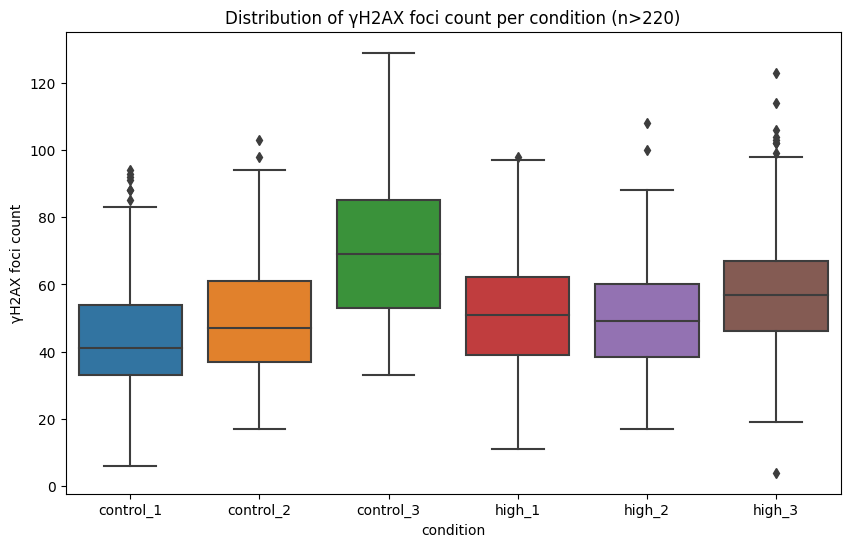

In [3]:
df = pd.read_pickle('dataframe_cleaned.pkl')
min_sample_size = df.groupby('condition').size().min()
plt.figure(figsize=(10,6))
df['condition'] = pd.Categorical(df['condition'], categories=['control_1', 'control_2', 'control_3','high_1', 'high_2', 'high_3'])
sns.boxplot(data=df, x='condition', y='gamma_foci_count', hue='condition', dodge=False)
plt.title(f'Distribution of γH2AX foci count per condition (n>{round(min_sample_size,-1)})')
plt.legend().remove()
plt.ylabel('γH2AX foci count')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Trying to predict control, low and high of all conditions

In [21]:
df = pd.read_pickle('dataframe_dropped.pkl')
df['condition'] = df['condition'].apply(lambda x: x.rsplit('_')[0])
df.sample(10)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-1,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,...,hc_foci_count,hc_foci_volume_mean,hc_foci_mean_intensity_variance,hc_foci_d2b_mean,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,condition
1887,2.276237,0.070797,0.606750,-0.819005,-0.247035,2.637453,0.182743,1.161688,0.074228,0.0,...,-0.928247,3.766204,-2.470203,3.941599,0.996720,2.748466,1.542837,2.086995,0.869894,control
1024,-0.157878,0.070797,0.920573,0.354481,-0.899176,0.186855,-0.950233,0.896352,-2.033606,0.0,...,0.507813,-0.574112,2.139921,-0.316291,-0.181252,-0.281891,-0.266562,0.734418,-0.748214,high
1099,0.178955,0.070797,-0.298522,0.163567,1.615187,-0.241882,-1.164904,0.286295,0.216750,0.0,...,0.397347,-0.415348,-0.378105,-0.714120,0.365895,1.196273,-0.253314,0.870815,2.098437,low
1822,-0.896063,0.070797,-0.227021,-1.402873,-0.875816,-1.142246,-0.027514,-0.845220,1.043888,0.0,...,-0.707315,0.095932,-0.326623,1.526598,-0.186175,0.108753,-0.164126,0.025491,0.577821,low
662,-0.167332,0.070797,-0.167726,1.672498,-0.731705,-0.019924,-0.203770,0.710962,-1.057434,0.0,...,-1.259646,1.498211,0.100746,-0.969504,0.932416,-0.913381,0.531401,0.177833,0.208430,control
1104,0.475858,0.070797,0.039535,0.410931,-1.035994,0.258288,-0.859625,-0.002658,0.339790,0.0,...,1.281077,-0.845860,-0.672860,-0.870960,-0.802758,-0.352687,-0.265246,-0.763469,0.070764,low
1513,0.641307,0.070797,-0.162212,0.772138,-0.039425,1.413347,0.219455,-1.500461,2.072181,0.0,...,0.507813,-0.570479,0.936105,-0.093441,0.075538,-0.019278,-0.240794,0.794727,0.576321,high
326,-1.404882,0.070797,-0.067861,-0.491885,0.046019,-1.164929,-0.902601,-1.072321,-0.267763,0.0,...,-1.370112,0.978361,1.987072,-0.372759,1.291652,0.920824,0.543119,1.294887,0.766828,low
1014,-1.480415,0.070797,0.965085,-0.556686,0.280630,-0.707485,0.358439,-1.133947,-0.901951,0.0,...,-0.817781,-0.351608,-0.848828,-1.106913,0.218956,-1.143110,-0.146988,-0.084920,-0.214449,high
1717,-0.826765,0.070797,0.274498,0.255656,-0.809660,0.523375,-0.396688,-0.473927,-1.486459,0.0,...,-0.817781,0.261804,1.046588,-0.942155,0.359642,1.132927,-0.137140,0.098287,0.585262,low


Average Train Accuracy: 1.0
Average Accuracy: 0.651749926318892


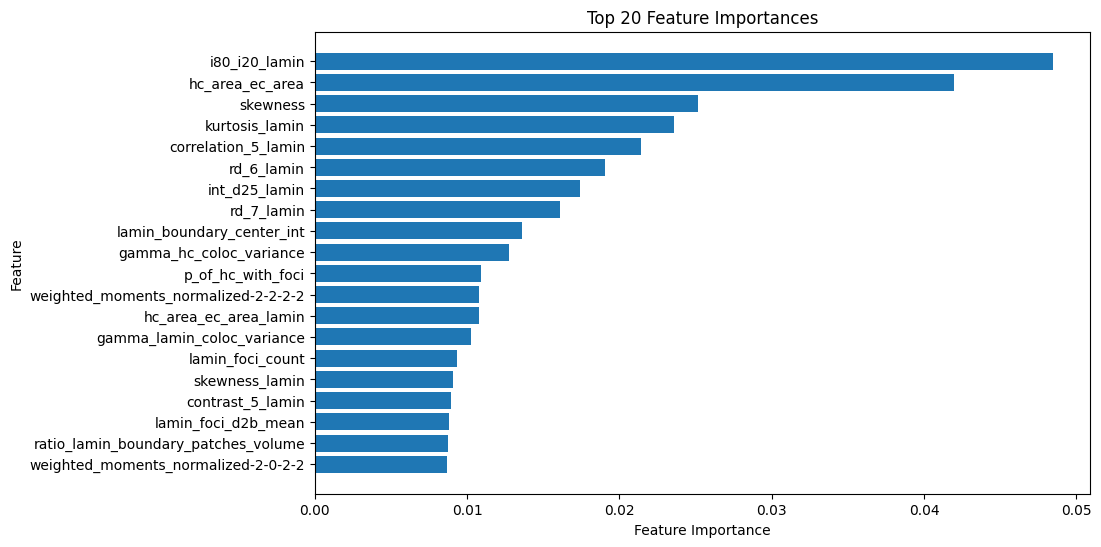

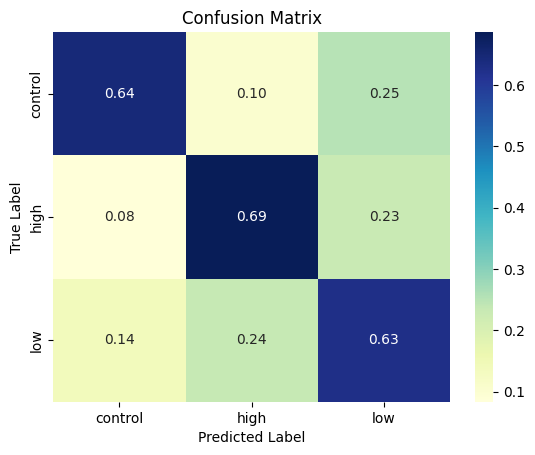

In [22]:
all_possible_rfc(df, 'all_features', compute_pairs=False, n_jobs=8)

In [23]:
df = df[df['condition'] != 'low']

Average Train Accuracy: 1.0
Average Accuracy: 0.8320574162679426


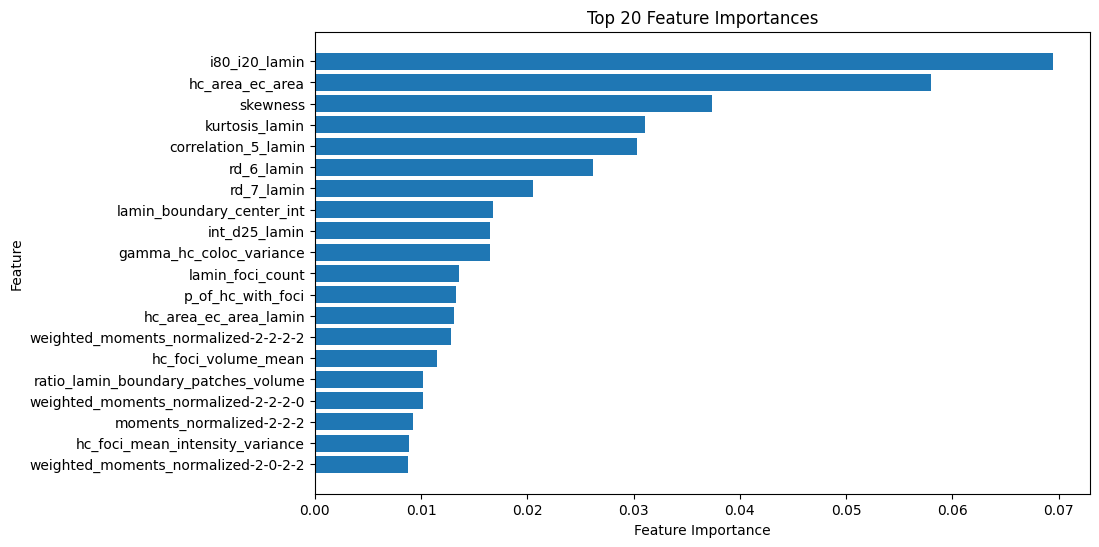

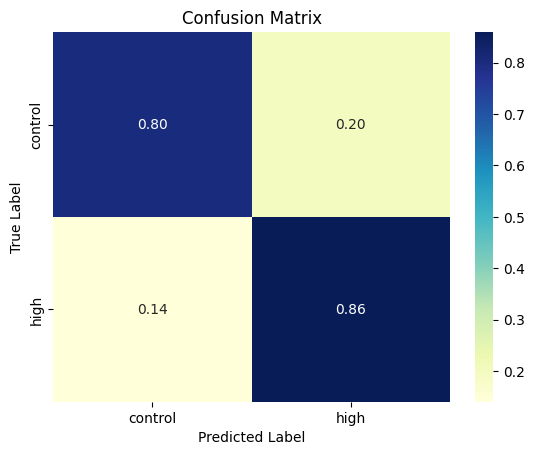

In [24]:
all_possible_rfc(df, 'all_features', compute_pairs=False, n_jobs=8)

<h5>Predicting on third batch - checking all combinations</h5>

In [16]:
def plot_confusion_matrix(cf):
    sns.heatmap(cf, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def plot_feature_importances(feature_importances):
    top20 = feature_importances['Feature Importance'].nlargest(20)
    plt.figure(figsize=(10, 6))
    plt.barh(top20.index, top20.values, align='center')
    plt.yticks(top20.index, top20.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
    plt.show()

Testing on 1
Train Score: 1.0
Test Score: 0.5277044854881267


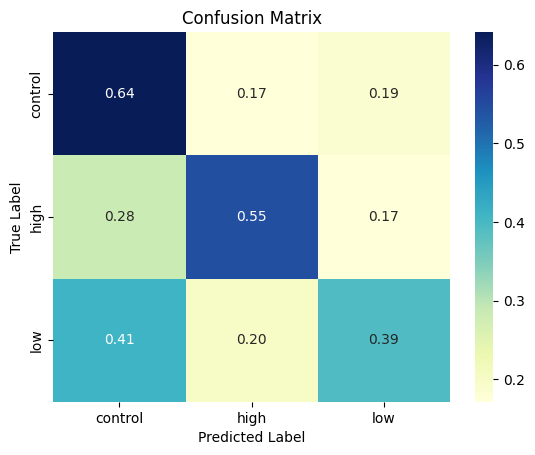

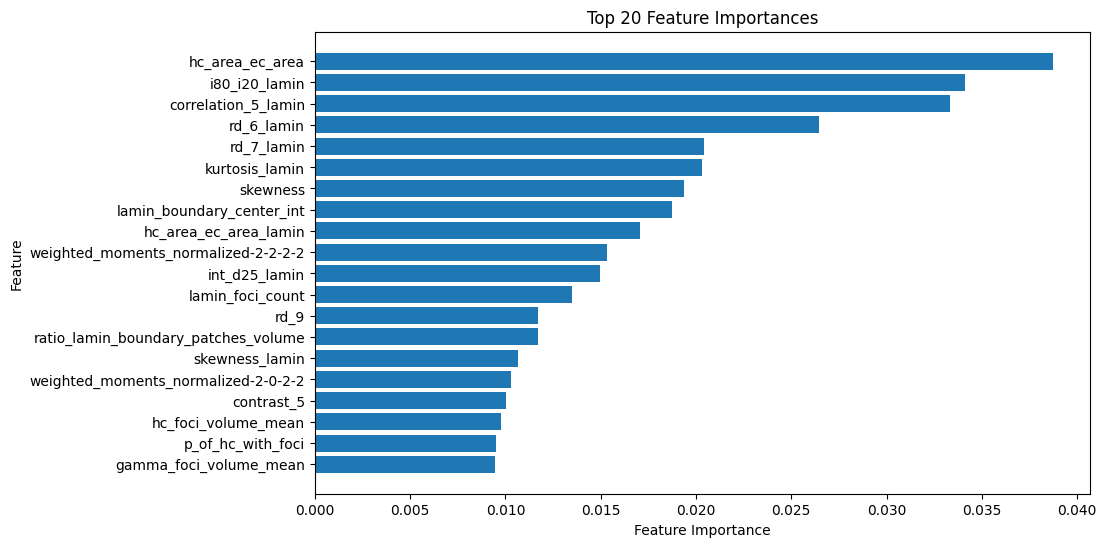

Train Score: 1.0
Test Score: 0.7015810276679841


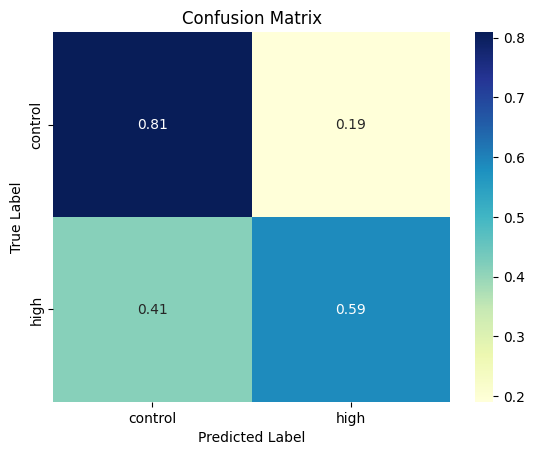

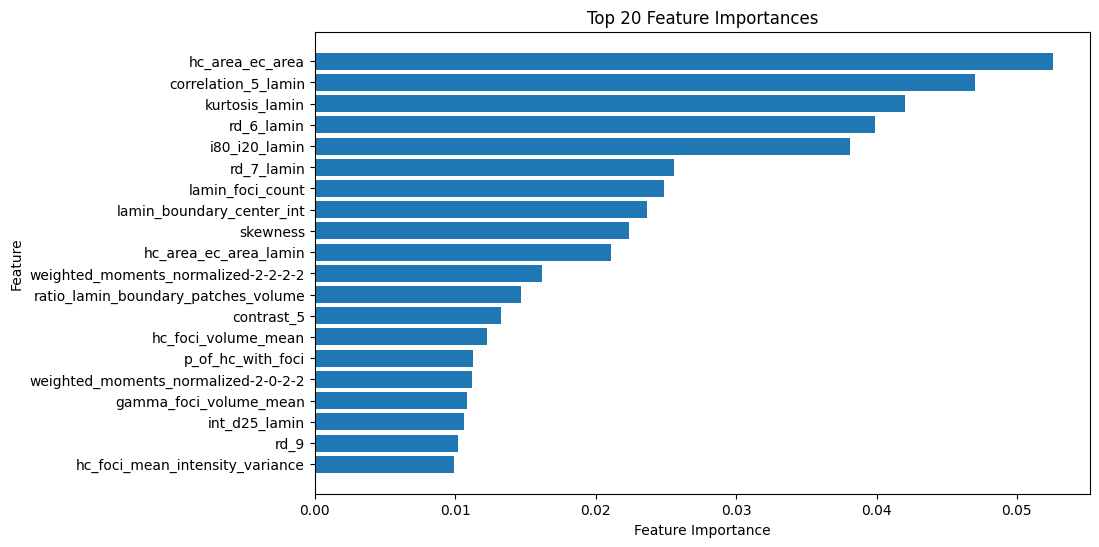

Testing on 2
Train Score: 1.0
Test Score: 0.4485387547649301


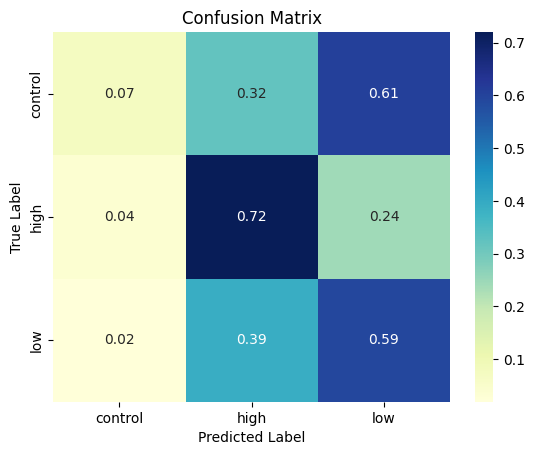

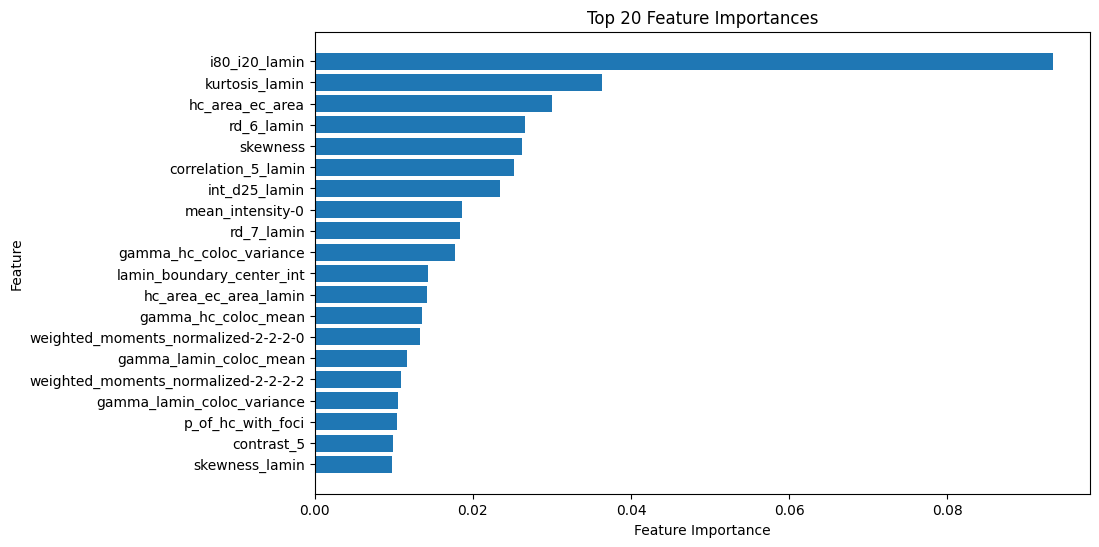

Train Score: 1.0
Test Score: 0.5096153846153846


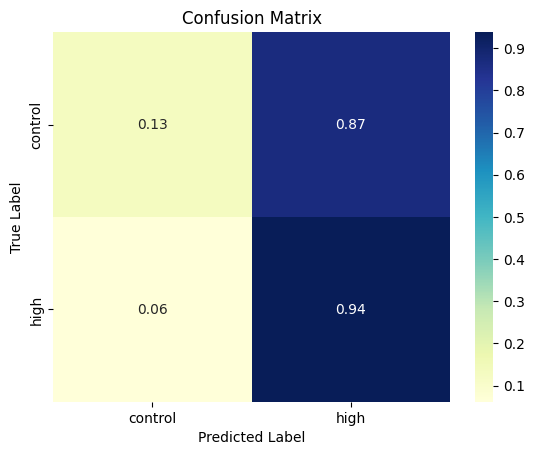

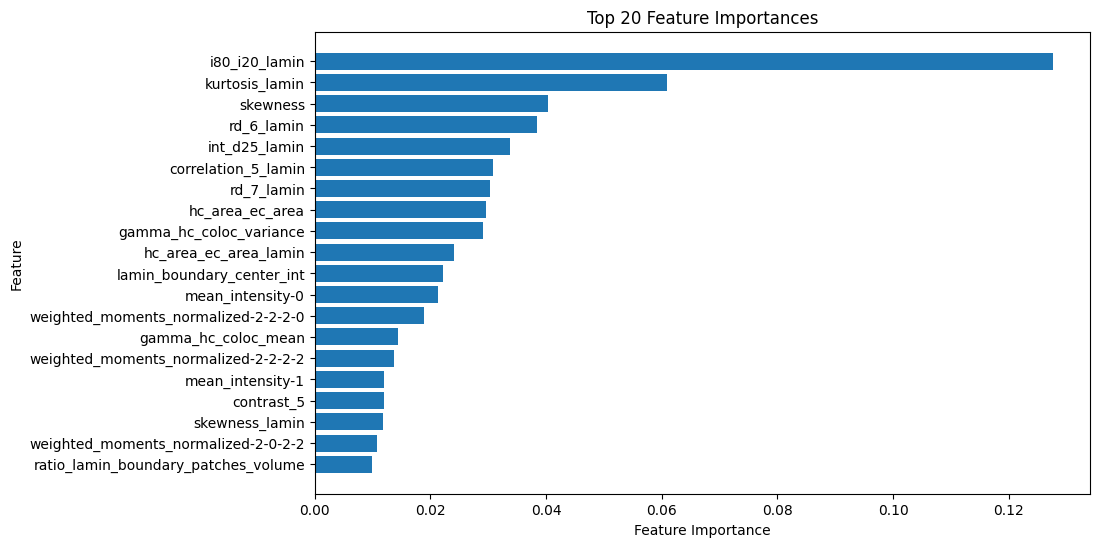

Testing on 3
Train Score: 1.0
Test Score: 0.5949367088607594


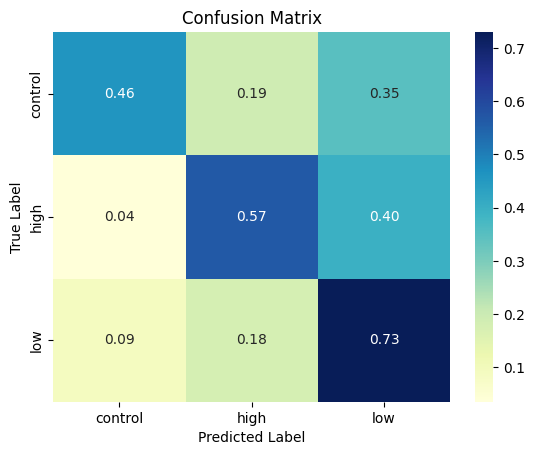

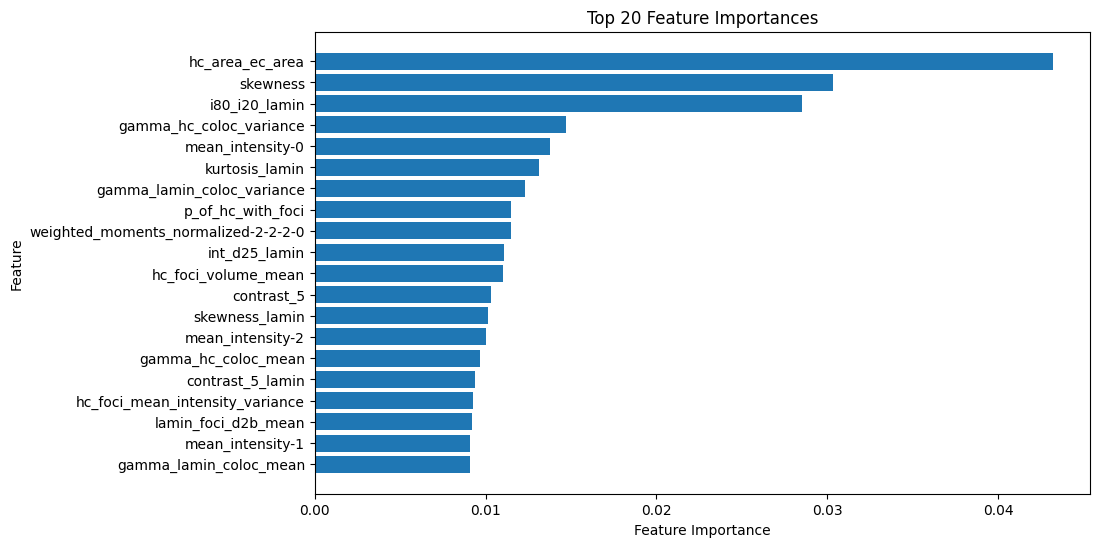

Train Score: 1.0
Test Score: 0.7881188118811882


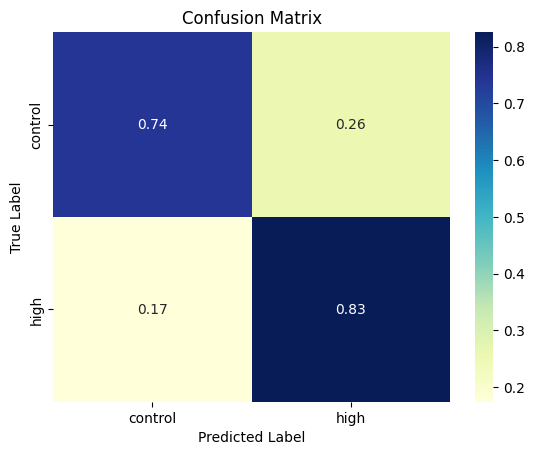

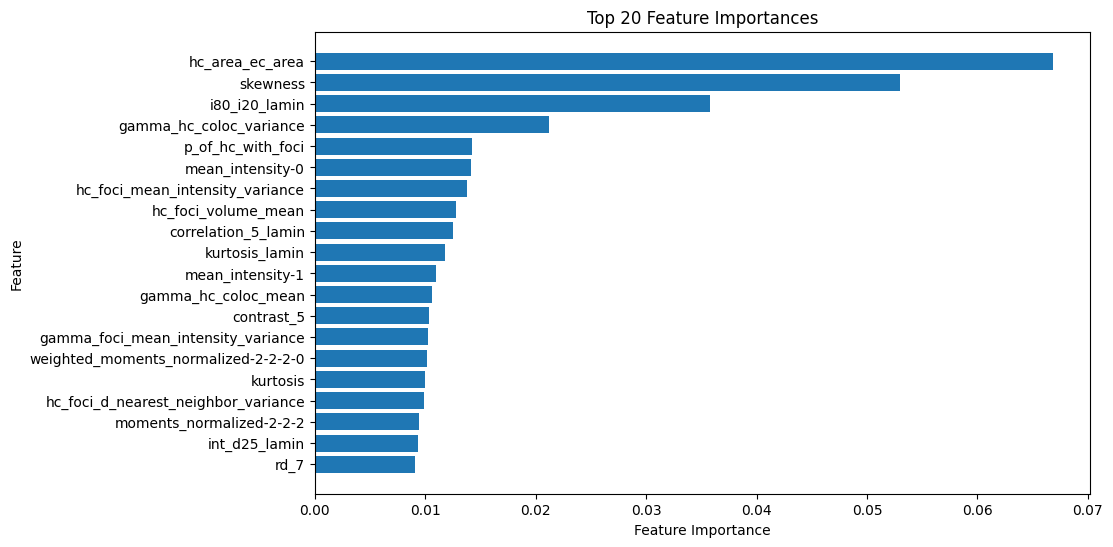

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


for i in range(3):

    pred_batch = i+1

    print(f'Testing on {pred_batch}')

    df = pd.read_pickle('dataframe_dropped.pkl')
    #df=df.drop(columns=['mean_intensity-0', 'i80_i20_lamin'])

    df[['condition_name', 'batch']] = df['condition'].str.split('_', expand=True)
    
    # Create a new DataFrame with only batch3 samples
    df_pred = df[df['batch'] == str(pred_batch)]
    
    # Create a DataFrame excluding batch3 samples
    df_train = df[df['batch'] != str(pred_batch)]
    
    # Drop the extra columns if not needed
    df_pred = df_pred.drop(columns=['condition', 'batch'])
    df_train = df_train.drop(columns=['condition', 'batch'])
    
    df_train.rename(columns={'condition_name' : 'condition'}, inplace=True)
    df_pred.rename(columns={'condition_name' : 'condition'}, inplace=True)

    columns = df_train.columns[0:-1]
    X_train = df_train[columns].to_numpy()
    y_train = df_train.condition.to_numpy()
    
    X_test = df_pred[columns].to_numpy()
    y_test = df_pred.condition.to_numpy()
    
    model = RandomForestClassifier(criterion="entropy", n_estimators=100, n_jobs=8)
    
    model.fit(X_train, y_train)
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sum_true_positives = cm.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = cm / sum_true_positives
    
    
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    
    plot_confusion_matrix(confusion_matrix_df)
    
    feature_importance_df = pd.DataFrame(model.feature_importances_, columns=["Feature Importance"], index=columns)
    
    plot_feature_importances(feature_importance_df)

    df_train = df_train[df_train['condition'] != 'low']
    df_pred = df_pred[df_pred['condition'] != 'low']

    columns = df_train.columns[0:-1]
    X_train = df_train[columns].to_numpy()
    y_train = df_train.condition.to_numpy()
    
    X_test = df_pred[columns].to_numpy()
    y_test = df_pred.condition.to_numpy()
        
    model = RandomForestClassifier(criterion="entropy", n_estimators=100, n_jobs=8)
    
    model.fit(X_train, y_train)
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sum_true_positives = cm.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = cm / sum_true_positives
    
    
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    
    plot_confusion_matrix(confusion_matrix_df)
    
    feature_importance_df = pd.DataFrame(model.feature_importances_, columns=["Feature Importance"], index=columns)

    plot_feature_importances(feature_importance_df)



Testing on 1
Train Score: 1.0
Test Score: 0.49868073878627966


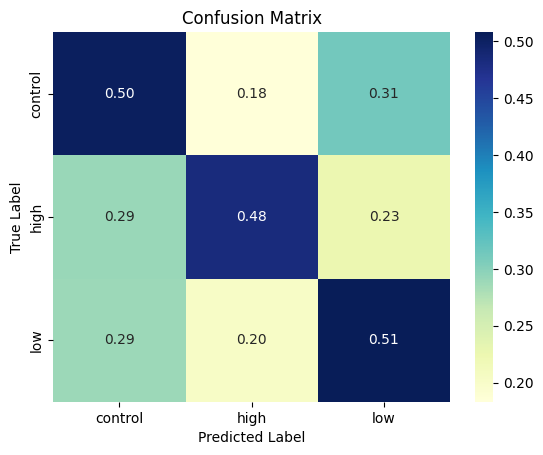

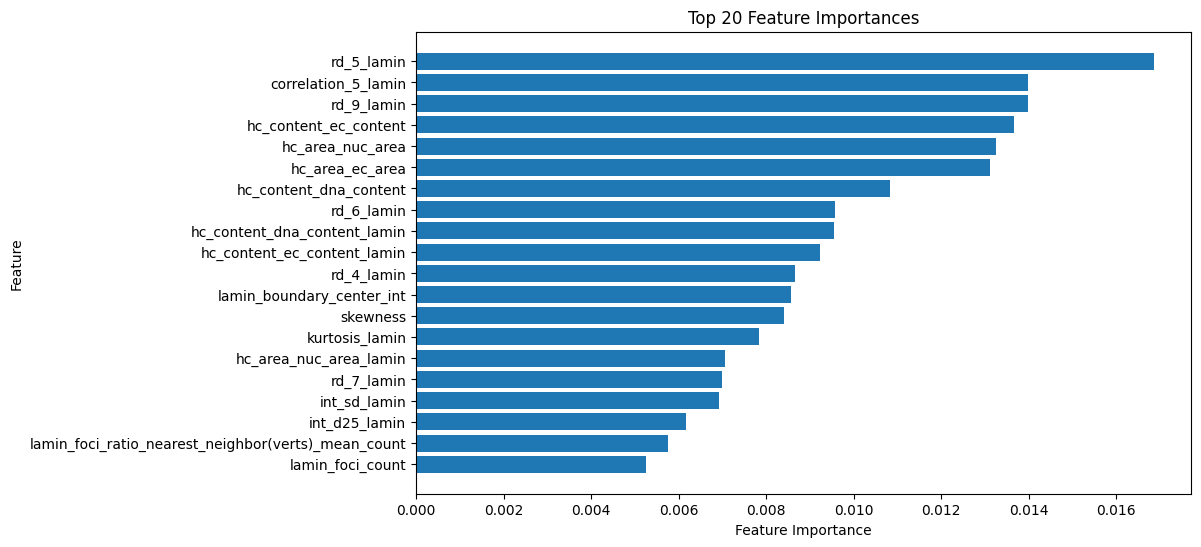

Train Score: 1.0
Test Score: 0.6976284584980237


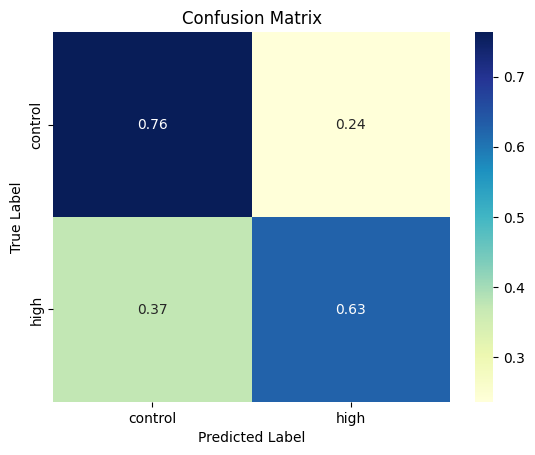

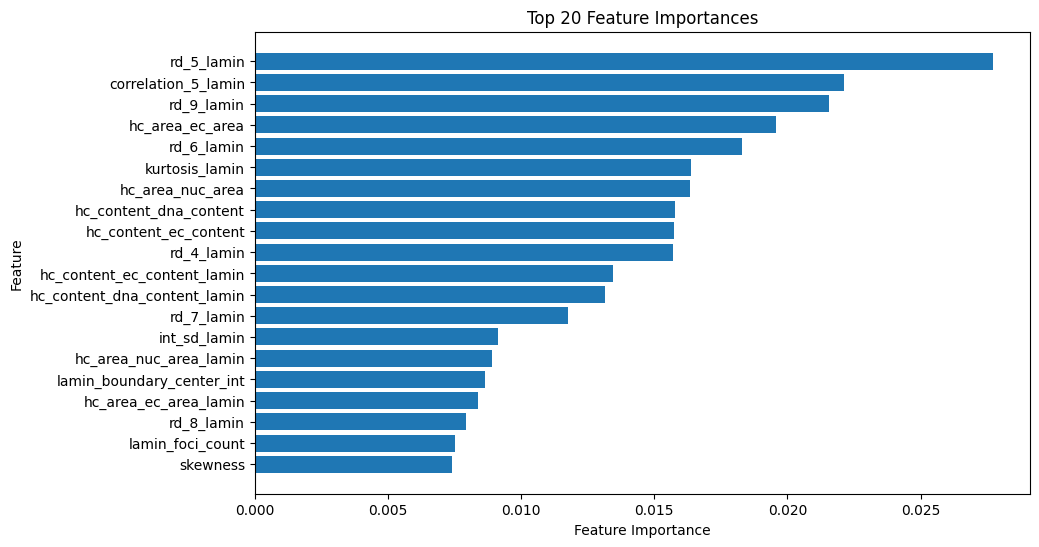

Testing on 2
Train Score: 1.0
Test Score: 0.40660736975857686


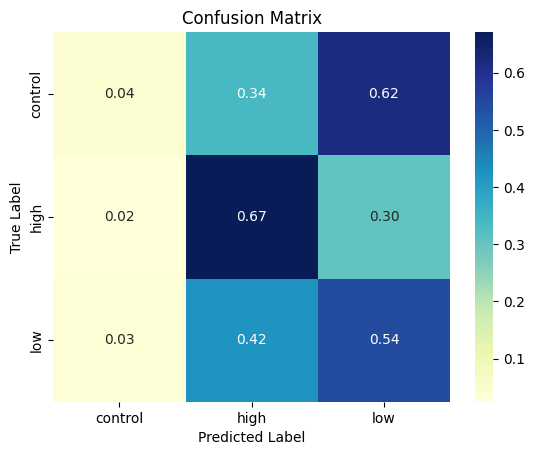

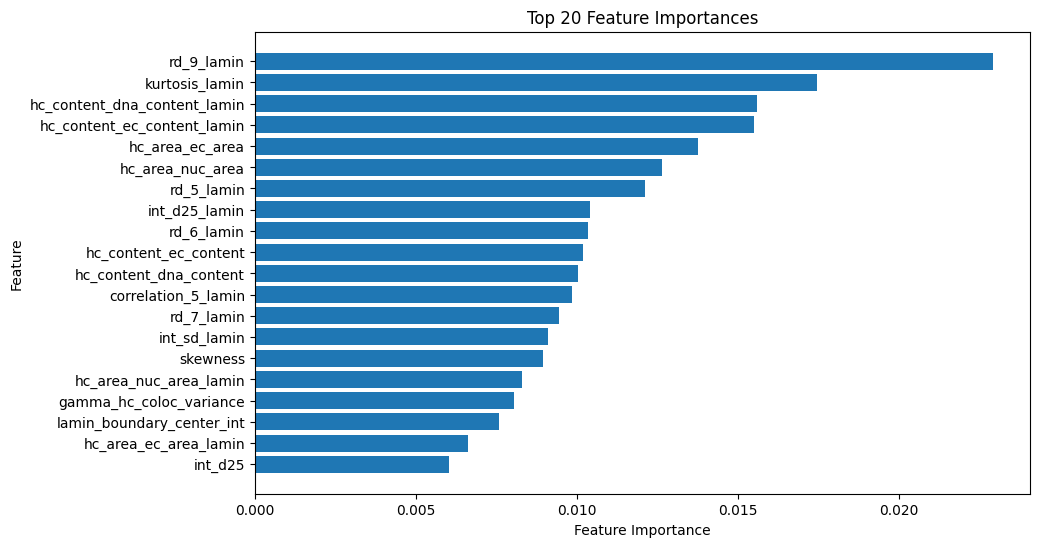

Train Score: 1.0
Test Score: 0.4846153846153846


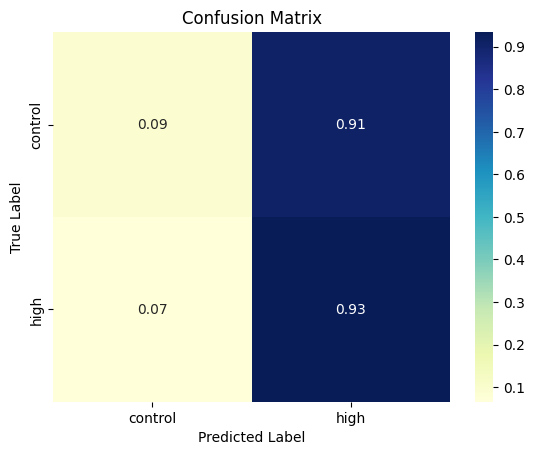

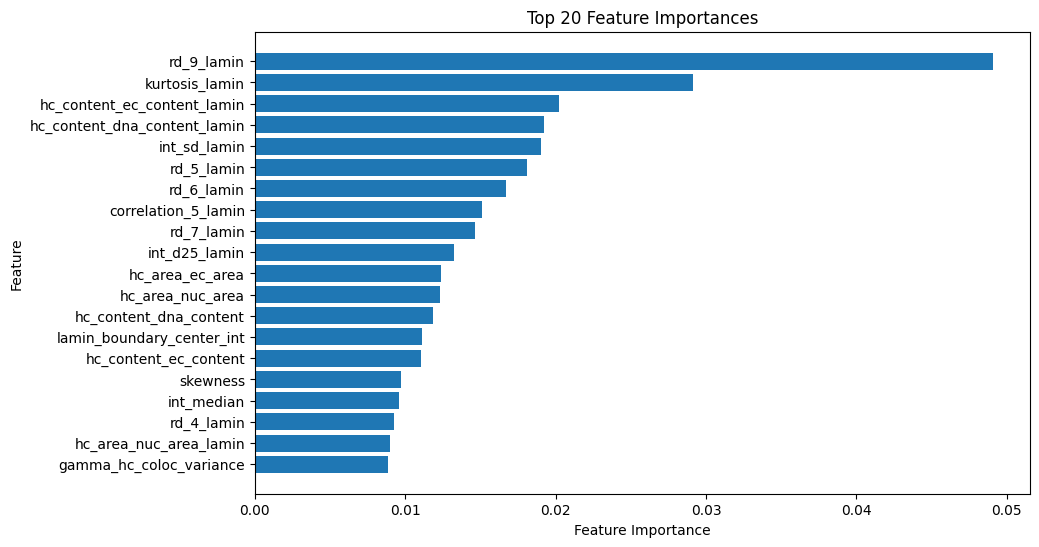

Testing on 3
Train Score: 1.0
Test Score: 0.5253164556962026


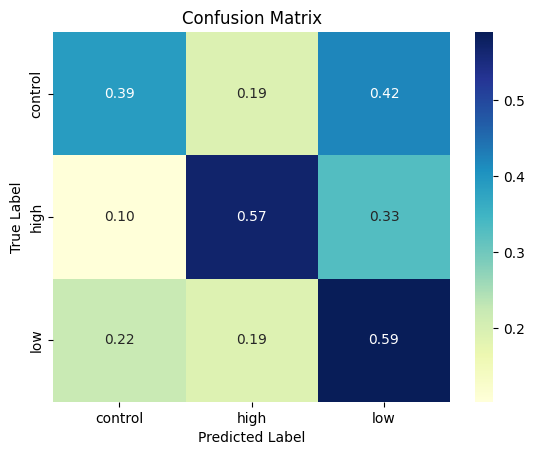

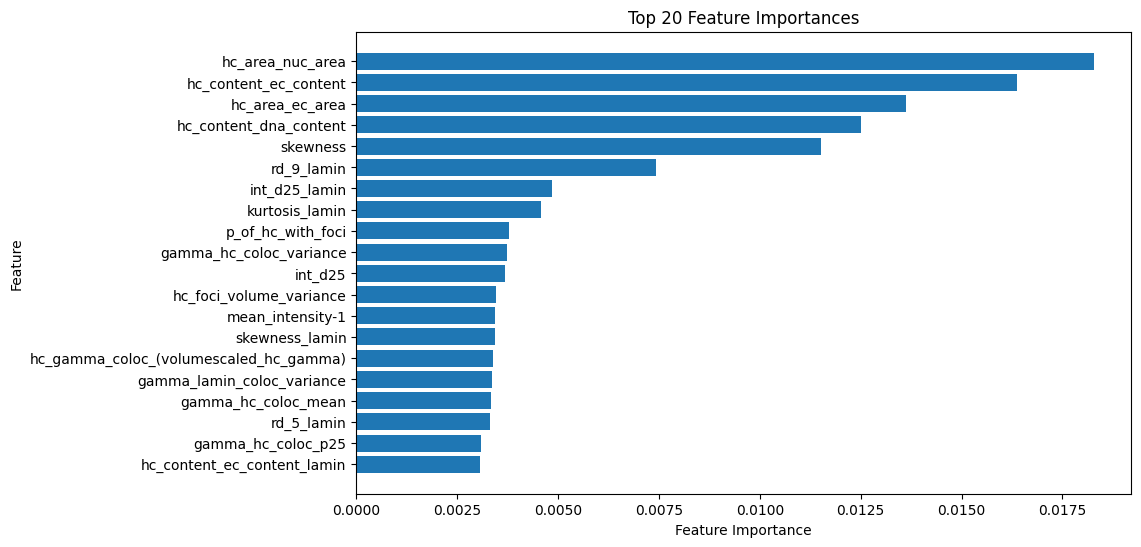

Train Score: 1.0
Test Score: 0.700990099009901


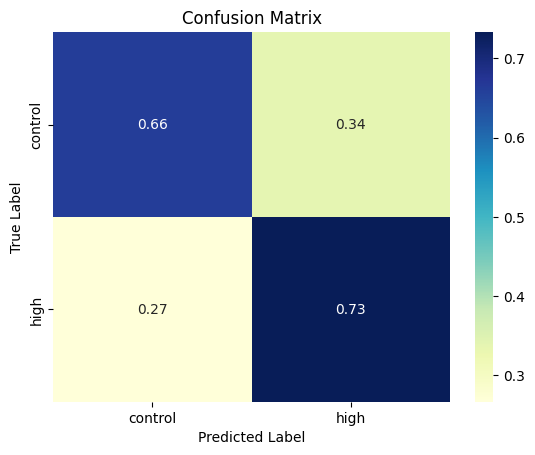

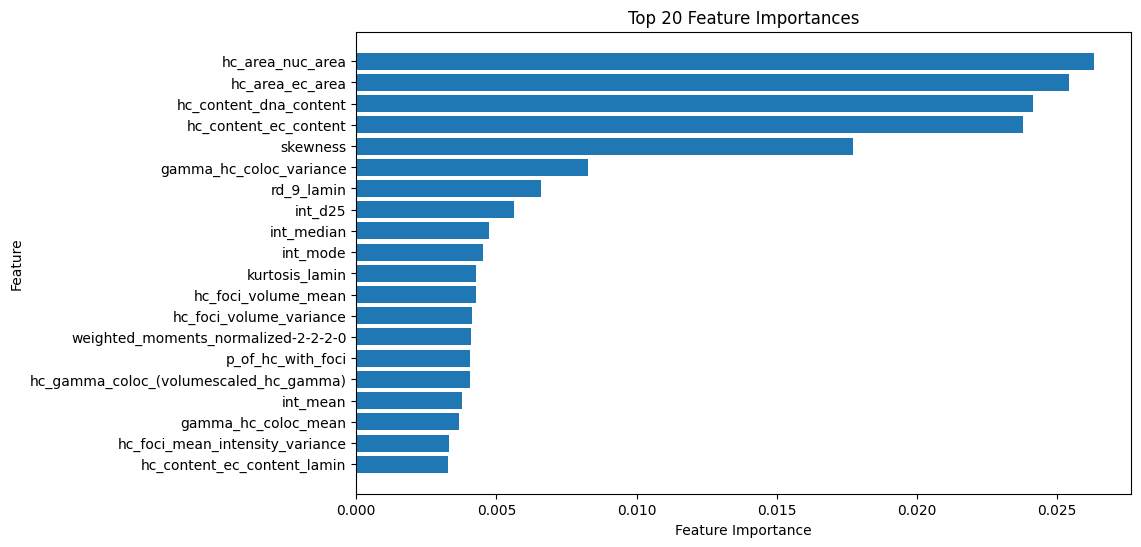

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


for i in range(3):

    pred_batch = i+1

    print(f'Testing on {pred_batch}')

    df = pd.read_pickle('dataframe_dropped.pkl')
    df=df.drop(columns=['mean_intensity-0', 'i80_i20_lamin'])

    df[['condition_name', 'batch']] = df['condition'].str.split('_', expand=True)
    
    # Create a new DataFrame with only batch3 samples
    df_pred = df[df['batch'] == str(pred_batch)]
    
    # Create a DataFrame excluding batch3 samples
    df_train = df[df['batch'] != str(pred_batch)]
    
    # Drop the extra columns if not needed
    df_pred = df_pred.drop(columns=['condition', 'batch'])
    df_train = df_train.drop(columns=['condition', 'batch'])
    
    df_train.rename(columns={'condition_name' : 'condition'}, inplace=True)
    df_pred.rename(columns={'condition_name' : 'condition'}, inplace=True)

    columns = df_train.columns[0:-1]
    X_train = df_train[columns].to_numpy()
    y_train = df_train.condition.to_numpy()
    
    X_test = df_pred[columns].to_numpy()
    y_test = df_pred.condition.to_numpy()
    
    model = RandomForestClassifier(criterion="gini", n_estimators=100, n_jobs=8)
    
    model.fit(X_train, y_train)
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sum_true_positives = cm.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = cm / sum_true_positives
    
    
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    
    plot_confusion_matrix(confusion_matrix_df)
    
    feature_importance_df = pd.DataFrame(model.feature_importances_, columns=["Feature Importance"], index=columns)
    
    plot_feature_importances(feature_importance_df)

    df_train = df_train[df_train['condition'] != 'low']
    df_pred = df_pred[df_pred['condition'] != 'low']

    columns = df_train.columns[0:-1]
    X_train = df_train[columns].to_numpy()
    y_train = df_train.condition.to_numpy()
    
    X_test = df_pred[columns].to_numpy()
    y_test = df_pred.condition.to_numpy()
        
    model = RandomForestClassifier(criterion="entropy", n_estimators=1000, n_jobs=8)
    
    model.fit(X_train, y_train)
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sum_true_positives = cm.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = cm / sum_true_positives
    
    
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    
    plot_confusion_matrix(confusion_matrix_df)
    
    feature_importance_df = pd.DataFrame(model.feature_importances_, columns=["Feature Importance"], index=columns)

    plot_feature_importances(feature_importance_df)



In [13]:
sum_score / 3

0.644167527120605

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

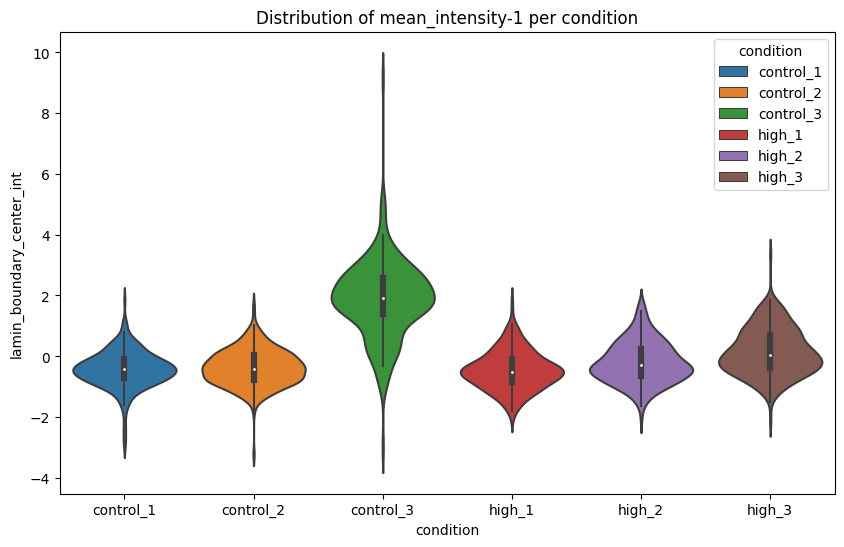

In [3]:
df = pd.read_pickle('dataframe_knn_imputed.pkl')
plt.figure(figsize=(10,6))
df['condition'] = pd.Categorical(df['condition'], categories=['control_1', 'control_2', 'control_3','high_1', 'high_2', 'high_3'])
sns.violinplot(data=df, x='condition', y='lamin_boundary_center_int', hue='condition', dodge=False)
plt.title('Distribution of mean_intensity-1 per condition')
plt.show()

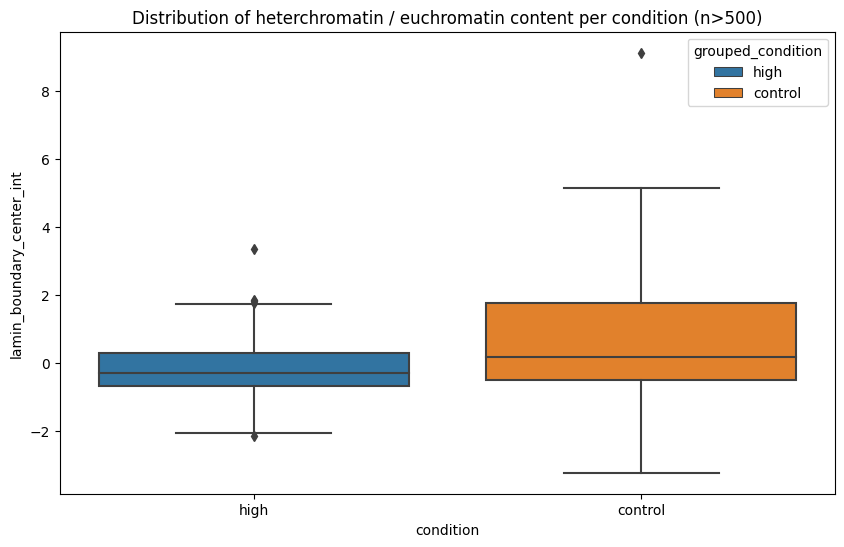

Minimum size of the grouped conditions: 501


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_pickle('dataframe_dropped.pkl')

# Group the conditions
condition_mapping = {
    'control_2': 'control',
    'control_3': 'control',
    'high_1': 'high',
    'high_2': 'high',
    'high_3': 'high'
}
df['grouped_condition'] = df['condition'].map(condition_mapping)

# Find the minimum size of the groups
group_sizes = df['grouped_condition'].value_counts()
min_size = group_sizes.min()

# Plot the data
plt.figure(figsize=(10, 6))
df['condition'] = pd.Categorical(df['condition'], categories=['control_2', 'control_3', 'high_1', 'high_2', 'high_3'])
sns.boxplot(data=df, x='grouped_condition', y='lamin_boundary_center_int', hue='grouped_condition', dodge=False)
plt.title(f'Distribution of heterchromatin / euchromatin content per condition (n>{round(min_size, -1)})')
plt.xlabel('condition')
plt.show()

print(f"Minimum size of the grouped conditions: {min_size}")
